In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel("Rent.xlsx")

In [50]:
df.head()

,area,rent,predicted result
0,2000,31500,31119.829003
1,2100,35000,33188.465690
2,2500,41050,41463.012439
3,2250,36100,36291.420721
4,3000,52100,51806.195874


In [51]:
df.tail()

,area,rent,predicted result
55,3100,54000,53874.832562
56,2750,48500,46634.604156
57,1800,25100,26982.555628
58,2200,31560,35257.102377
59,3100,51600,53874.832562


In [52]:
df.head(7)

,area,rent,predicted result
0,2000,31500,31119.829003
1,2100,35000,33188.465690
2,2500,41050,41463.012439
3,2250,36100,36291.420721
4,3000,52100,51806.195874
5,1900,32500,29051.192316
6,1500,20000,20776.645567


In [53]:
df['rent'].head(6)

0    31500
1    35000
2    41050
3    36100
4    52100
5    32500
Name: rent, dtype: int64

In [54]:
df[5:10]

,area,rent,predicted result
5,1900,32500,29051.192316
6,1500,20000,20776.645567
7,1850,24500,28016.873972
8,2700,48000,45600.285813
9,2100,31000,33188.465690


In [55]:
df.mean()

area                 2289.000000
rent                37269.166667
predicted result    37098.189029
dtype: float64

In [56]:
df.area.mean()

2289.0

In [57]:
df.describe()

,area,rent,predicted result
count,60.000000,60.000000,60.000000
mean,2289.000000,37269.166667,37098.189029
std,538.880509,11770.736234,11147.479917
min,1200.000000,20000.000000,14570.735506
25%,1900.000000,31000.000000,29051.192316
50%,2130.000000,34450.000000,33809.056696
75%,2700.000000,47625.000000,45600.285813
max,3500.000000,70500.000000,62149.379310


In [58]:
df.area.std()

538.8805093801691

In [59]:
df.shape

(60, 3)

In [60]:
row, col = df.shape

In [61]:
row

60

In [62]:
col

3

In [63]:
df.isnull().sum()

area                0
rent                0
predicted result    0
dtype: int64

Text(0.5, 1.0, 'Rent plot')

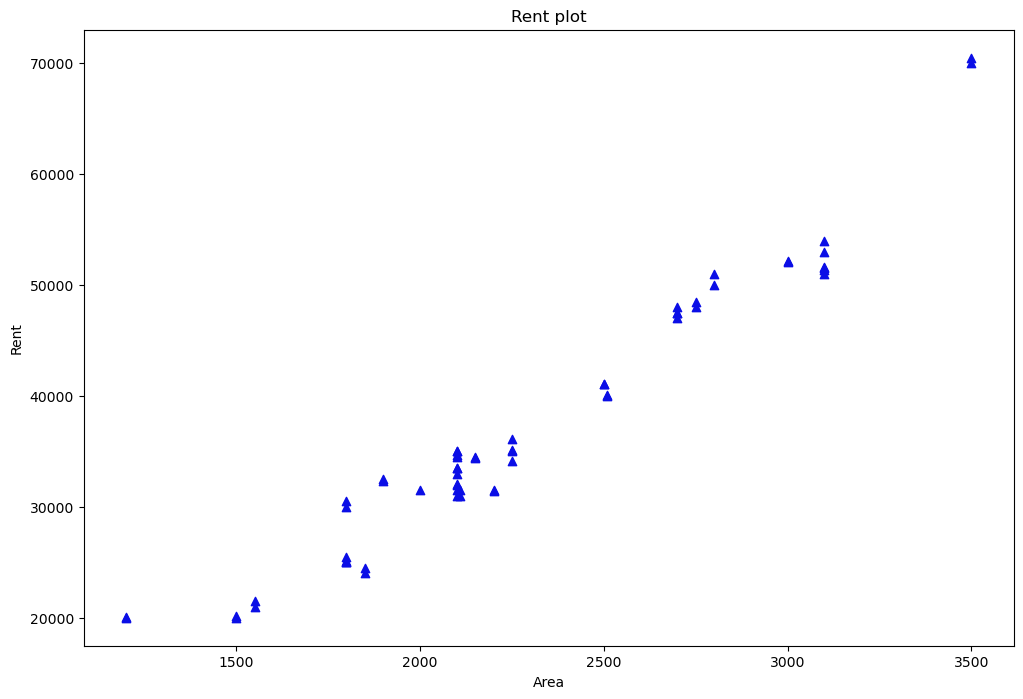

In [64]:
plt.figure(figsize=(12,8))
plt.scatter(df.area, df.rent, marker='^', color='#0B0EE6')
plt.xlabel("Area", color="Black")
plt.ylabel("Rent")
plt.title("Rent plot")

In [65]:
x = df[["area"]]
y = df["rent"]

In [66]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [67]:
from sklearn.model_selection import train_test_split as tts 

In [68]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=42)

In [69]:
xtrain.head()

,area
40,2150
4,3000
43,2510
19,2700
34,3000


In [70]:
ytrain.head()

40    34400
4     52100
43    40000
19    47000
34    52200
Name: rent, dtype: int64

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
reg = LinearRegression()

In [73]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [74]:
m = reg.coef_
m

array([20.68636687])

In [75]:
c = reg.intercept_
c

-10252.904740336751

In [76]:
x1 = 2100
y = m * x1 + c
y

array([33188.46568994])

In [77]:
reg.predict([[2100]])

array([33188.46568994])

In [78]:
pred = reg.predict(xtest)
pred

array([31119.82900279, 29051.19231563, 20776.64556701, 53874.83256151,
       41669.87610729, 47668.92250004, 36291.42072068, 26982.55562848,
       33188.46568994, 26982.55562848, 26982.55562848, 33395.32935866,
       33188.46568994, 36291.42072068, 62149.37931013, 21810.96391059,
       45600.28581288, 20776.64556701])

In [79]:
df['predicted result'] = reg.predict(x)

In [80]:
df.head()

,area,rent,predicted result
0,2000,31500,31119.829003
1,2100,35000,33188.465690
2,2500,41050,41463.012439
3,2250,36100,36291.420721
4,3000,52100,51806.195874


In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [82]:
mae = mean_absolute_error(ytest,pred)
mae

2103.5083233624173

In [83]:
mse = mean_squared_error(ytest,pred)
mse

7677066.2483788

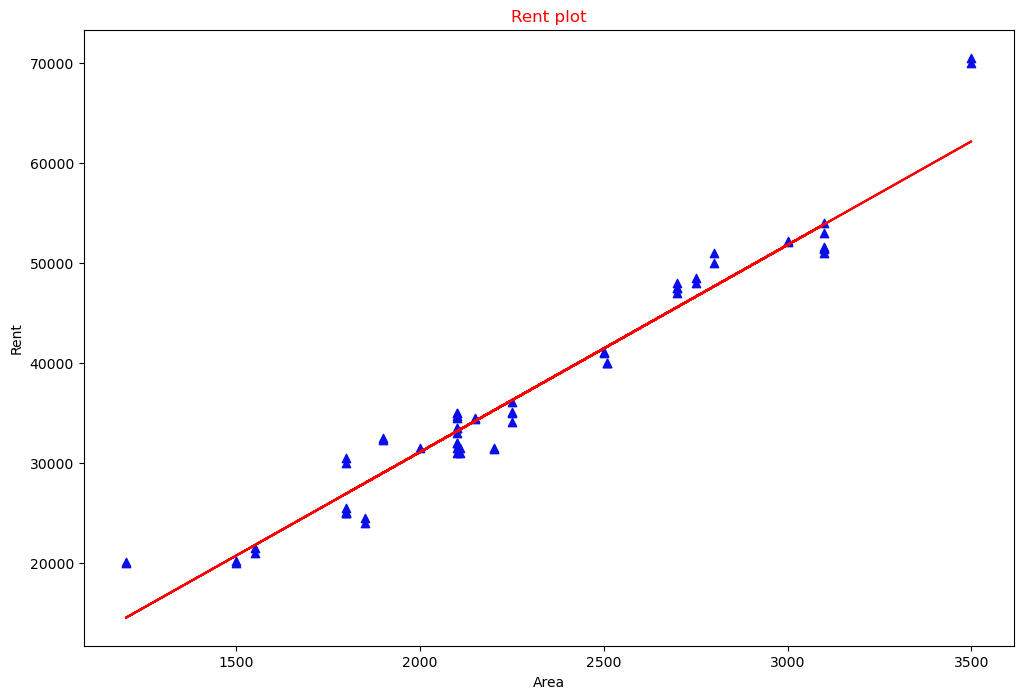

In [84]:
plt.figure(figsize=(12,8))
plt.scatter(df.area , df.rent, marker='^' , color='#0B0EE8') 
plt.xlabel('Area', color='black')
plt.ylabel('Rent')
plt.title('Rent plot', color='red')
plt.plot(xtrain , reg.predict(xtrain), color='red')

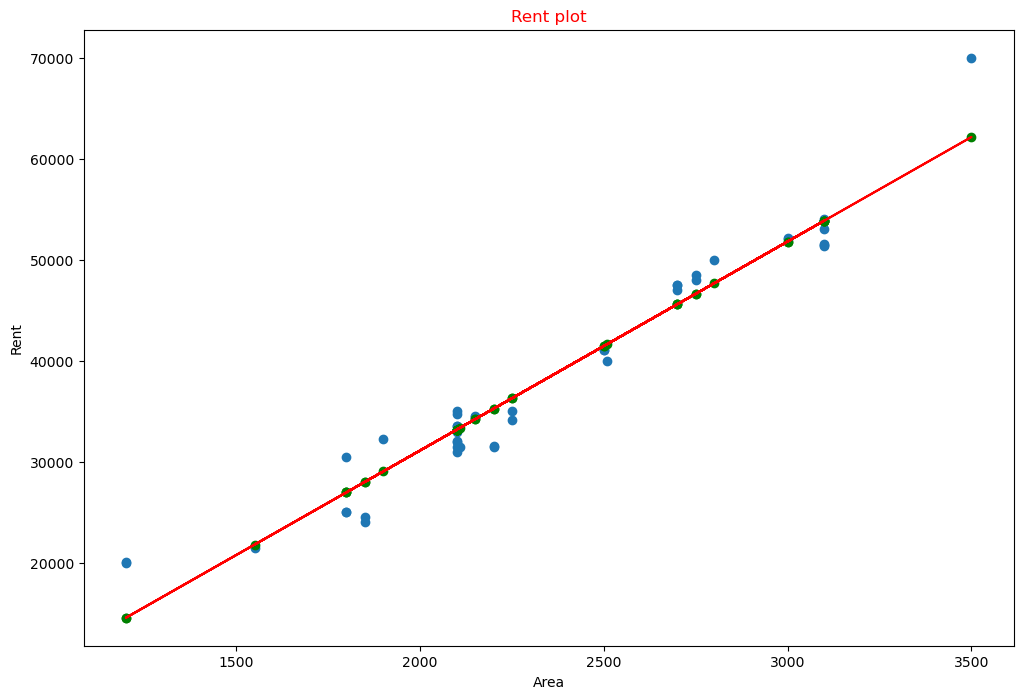

In [85]:
plt.figure(figsize=(12,8))
plt.xlabel('Area', color='black')
plt.ylabel('Rent')
plt.title('Rent plot', color='red')
plt.plot(xtrain , reg.predict(xtrain), color='red')
plt.scatter(xtrain, ytrain)
plt.scatter(xtrain, reg.predict(xtrain), color='green')

In [86]:
import warnings
warnings.filterwarnings('ignore')

reg.predict([[2500]])

array([41463.01243857])

In [87]:
reg.score(xtest, ytest)

0.9515542918540623

In [88]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.9515542918540623

In [89]:
import pickle as pk 
import joblib as jb

In [90]:
pk.dump(reg,open("pk1","wb"))

In [91]:
reg2 = pk.load(open("pk1","rb"))

In [92]:
reg2.predict([[2000]])

array([31119.82900279])

In [93]:
 jb.dump(reg,'jb1')

['jb1']

In [94]:
reg3 = jb.load('jb1')

In [95]:
reg3.predict([[2000]])

array([31119.82900279])